# 日経平均株価

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

## 日経平均株価の yf.Ticker インスタンスの作成

In [2]:
symbol = '^N225'
ticker = yf.Ticker(symbol)

## 過去６ヶ月の日足データを取得

In [3]:
df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-09 00:00:00+09:00,36915.441406,37287.261719,36807.031250,36897.421875,146800000,0.0,0.0
2024-02-13 00:00:00+09:00,37248.359375,38010.691406,37184.101562,37963.968750,140500000,0.0,0.0
2024-02-14 00:00:00+09:00,37712.871094,37825.851562,37594.468750,37703.320312,120300000,0.0,0.0
2024-02-15 00:00:00+09:00,38017.828125,38188.738281,37935.359375,38157.941406,130000000,0.0,0.0
2024-02-16 00:00:00+09:00,38517.371094,38865.058594,38361.550781,38487.238281,151700000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00+09:00,35249.359375,35301.179688,31156.119141,31458.419922,285600000,0.0,0.0
2024-08-06 00:00:00+09:00,32077.330078,34911.800781,32077.330078,34675.460938,251200000,0.0,0.0
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0


### ローソク足チャートと出来高、モメンタム

Reference: https://mekatana.com/python-momentum/

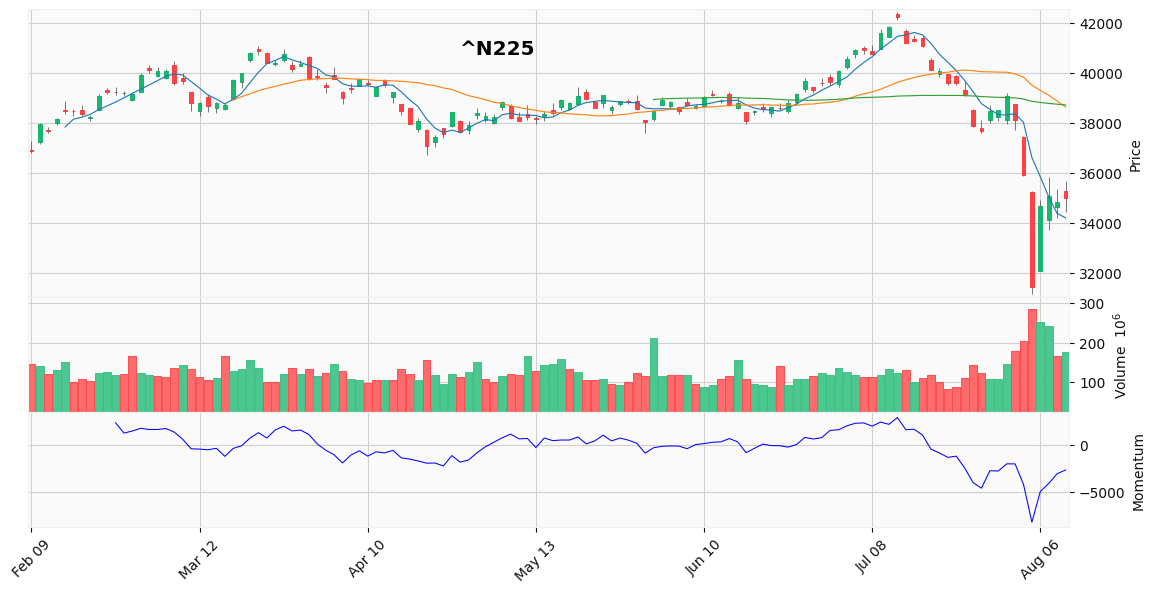

In [4]:
# モメンタムの計算
period = 10
df['momentum'] = df['Close'] - df['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(
        df['momentum'],
        ylabel='Momentum',
        color='b',
        width=0.75,
        panel=2,
    )
]

mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    addplot=apd_roscillator,
    title=symbol,
    figsize=(12, 6),
    tight_layout=True,
    #savefig=dict(fname='n225_momentum.jpeg', dpi=100)
)

### ローソク足チャートとボリンジャーバンド

Reference: https://mekatana.com/bollinger-bands-python/

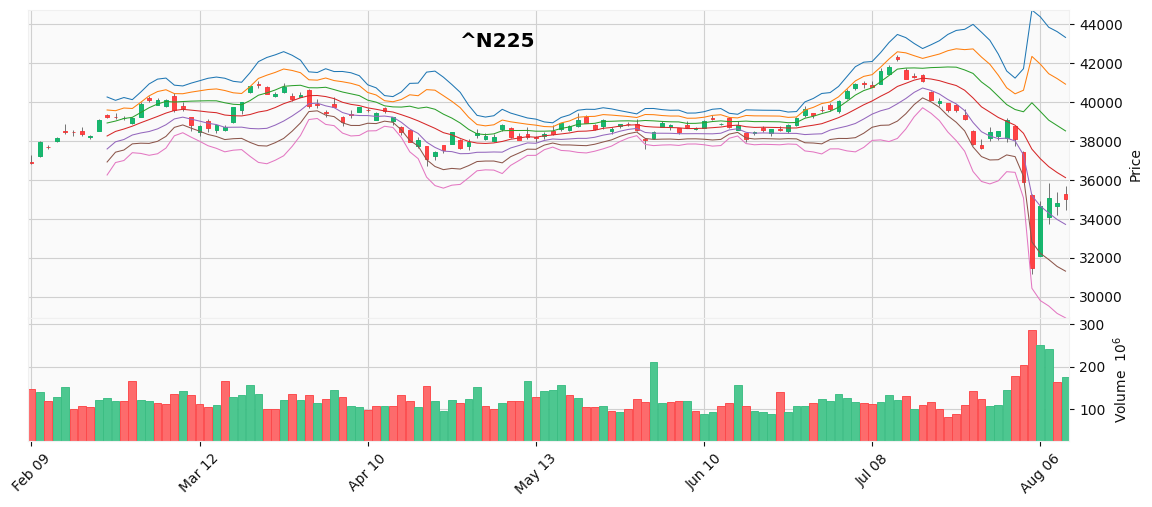

In [5]:
# ボリンジャーバンド
period = 10
r = df['Close'].rolling(period)    
df['upper3'] = r.mean() + 3 * r.std()
df['upper2'] = r.mean() + 2 * r.std()
df['upper1'] = r.mean() + 1 * r.std()
df['mean'] = r.mean()
df['lower1'] = r.mean() - 1 * r.std()
df['lower2'] = r.mean() - 2 * r.std()
df['lower3'] = r.mean() - 3 * r.std()

df_upper3_max=df['upper3'].max() + 10
df_lower3_min=df['lower3'].min() - 10 

apd_oscilator  = [
    mpf.make_addplot(df[['upper3', 'upper2', 'upper1','mean', 'lower1', 'lower2', 'lower3']], width=0.75)
]   

mpf.plot(
    df, type='candle', style='yahoo',
    volume=True,
    title=symbol,
    addplot=apd_oscilator,
    ylim=(df_lower3_min, df_upper3_max),
    figsize=(12, 5),
    tight_layout=True,
    #savefig=dict(fname='n225_bollinger-bands.jpeg', dpi=100)
)

## 過去10年の月足データ

In [6]:
df_long = ticker.history(period='10y', interval='1mo')
df_long

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-01 00:00:00+09:00,15454.589844,16374.139648,15440.990234,16173.519531,2530100000,0.0,0.0
2014-10-01 00:00:00+09:00,16173.389648,16533.910156,14529.030273,16413.759766,3436700000,0.0,0.0
2014-11-01 00:00:00+09:00,16732.849609,17520.539062,16713.369141,17459.849609,3155400000,0.0,0.0
2014-12-01 00:00:00+09:00,17475.099609,18030.830078,16672.939453,17450.769531,2962900000,0.0,0.0
2015-01-01 00:00:00+09:00,17325.679688,17850.589844,16592.570312,17674.390625,2691500000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00+09:00,40646.699219,40697.218750,36733.058594,38405.660156,2522300000,0.0,0.0
2024-05-01 00:00:00+09:00,38107.378906,39437.160156,37617.000000,38487.898438,2632400000,0.0,0.0
2024-06-01 00:00:00+09:00,38734.949219,39788.628906,37950.199219,39583.078125,2209000000,0.0,0.0


### 2020年３月の日経平均株価

月次終値としては2017年３月（１万8909円26銭）以来、３年ぶりの水準に落ち込んだ。新型コロナウイルスの感染者が世界的に増え続け、終息の兆しが見えないなか、実体経済への影響を警戒した売りが広がった。原油安や急速な円高・ドル安を受け、運用リスクを回避する株売りも目立った。

Reference: https://indexes.nikkei.co.jp/atoz/2020/04/202003.html

In [7]:
origin = pd.to_datetime('2018-01-01 00:00:00+09:00')
price_min = min(df_long[df_long.index > origin]['Low'])
df_long_min = df_long[df_long['Low'] == price_min]
#price_min = df_long_min['Low'].iloc[0]
ts_min = df_long_min.index[0]
print(ts_min, price_min)
df_long_min

2020-03-01 00:00:00+09:00 16358.1904296875


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-01 00:00:00+09:00,20849.789062,21719.779297,16358.19043,18917.009766,3101700000,0.0,0.0


### 2024年7月の日経平均株価

７月前半は米連邦準備理事会（ＦＲＢ）の早期利下げへの期待を背景に、米国市場でハイテク株が上昇。東京市場でも半導体関連株が買われて日経平均が上昇し、11日には４万2224円02銭と終値で史上初めて４万2000円台を記録した。

Reference: https://indexes.nikkei.co.jp/atoz/2024/08/20247.html

In [8]:
price_max = max(df_long['High'])
df_long_max = df_long[df_long['High'] == price_max]
#price_max = df_long_max['High'].iloc[0]
ts_max = df_long_max.index[0]
print(ts_max, price_max)
df_long_max

2024-07-01 00:00:00+09:00 42426.76953125


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-01 00:00:00+09:00,39839.820312,42426.769531,37611.191406,39101.820312,2570500000,0.0,0.0


In [9]:
delta = price_max - price_min
level1 = price_max - 0.236 * delta
level2 = price_max - 0.382 * delta
level3 = price_max - 0.618 * delta

## フィボナッチリトレースメント

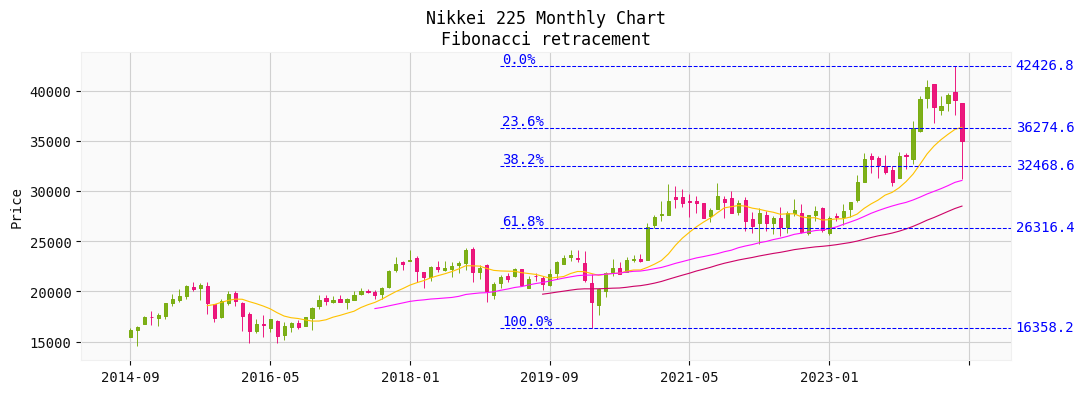

In [10]:
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(12, 4))

mpf.plot(
    df_long, type='candle', style='binance', datetime_format='%Y-%m', xrotation=0, mav=(12, 36, 60),
    ax = ax,
)

# フィボナッチリトレースメント
x_start = 0.45
x_left = ax.get_xlim()[0]
x_right = ax.get_xlim()[1]
x_mid = (x_right - x_left) * (x_start - 0.05)
x_delta = x_right - x_left
x_adjust = x_delta * 0.005

y_min = ax.get_ylim()[0]
y_max = ax.get_ylim()[1]
y_delta = y_max - y_min
y_adjust = y_delta * 0.01
for y, v in zip([price_max, level1, level2, level3, price_min],[0, 23.6, 38.2, 61.8, 100]):
    plt.axhline(y, xmin=x_start, label = 'Top', linestyle = 'dashed', linewidth=0.75, color = 'b')
    plt.text(x_right + x_adjust, y - y_adjust, '%.1f' % y, color='b')
    plt.text(x_mid, y + y_adjust, '%.1f%%' % v, color='b')

plt.title('Nikkei 225 Monthly Chart\nFibonacci retracement')
plt.savefig('n255_fibonacci.png')
plt.show()